<a href="https://colab.research.google.com/github/pinkdolphin11/ESAA/blob/main/HW_0916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 4. 모델 훈련

### 4.1 선형 회귀

일반적인 선형 모델은 입력 특성의 가중치 합과 편향(절편)이라는 상수를 더해 만든다.

<선형 회귀 모델의 예측식>

${\hat y} = \theta_{0}\ + \theta_{1}x_{1}\ + \theta_{2}x_{2}\ + ... + \theta_{n}x_{n}\ $

${\hat y}$ : 예측값

$n$ : 특성의 수

$x_{i}$ : i번째 특성값

$\theta_{j}\ : j$번째 모델 파라미터(편향과 가중치 모두 포함)

모델 훈련 : 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것. 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 한다. 선형 회귀 모델을 훈련시키려면 평균 제곱근 오차(RMSE)를 최소화하는 $\theta\$를 찾아야 한다.

<선형 회귀 모델의 MSE 비용 함수>

훈련 세트 X에 대한 선형 회귀 가설 $h_{0}$의 MSE는 다음과 같은 식으로 계산한다.

$MSE(X,h_{0}) = \frac{1}{m}\sum_{i = 1}^{m}(\theta^{T}x^{(i)}-y^{(i)})^2$

#### 4.1.1 정규방정식

정규방정식(normal equation) : 비용 함수를 최소화하는 $\theta$를 찾기 위한 공식

${\hat \theta} = (X^{T}X)^{-1}X^{T}y$

${\hat \theta}$ : 비용 함수를 최소화하는 ${\theta}$값

y : $y^{1}부터 y^{m}까지 포함하는 타깃 벡터$

In [1]:
#공식 테스트를 위해 선형처럼 보이는 데이터 생성
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [3]:
#정규방정식을 사용해 세타 hat 계산

X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.64669718],
       [3.26832387]])

$\theta_{0}\ = 3.6467, \theta_{1}\ = 3.2683$으로 기대했던 $\theta_{0}\ = 4, \theta_{1}\ = 3$과 비슷하지만 정확하지는 않은 값이 출력되었다.

In [4]:
#세타 hat을 사용한 예측

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.64669718],
       [10.18334492]])

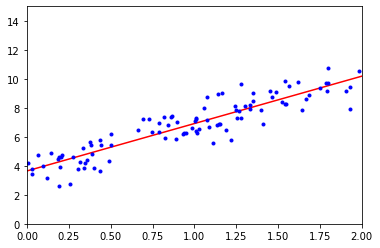

In [5]:
#예측을 그래프에 나타내기

import matplotlib.pyplot as plt

plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [6]:
#사이킷런에서 선형 회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.64669718],
       [10.18334492]])

${\hat \theta} = X^{+}y$를 계산하는 함수

$X^{+}$ : X의 유사역행렬(무어-펜로즈 역행렬)

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.64669718],
       [3.26832387]])

In [9]:
#np.linalg.pinv() 함수로 유사역행렬 직접 구하기
np.linalg.pinv(X_b).dot(y)

array([[3.64669718],
       [3.26832387]])

유사역행렬은 특잇값 분해(SVD)라는 표준 행렬 분해 기법을 사용해 계산된다. SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셈 $U\sum V^{T}$로 분해한다.

유사역행렬은 $X^{+}=V\sum^{+}U^{T}$로 계산된다. $\sum^{+}$를 계산하기 위해 알고리즘이 $\sum$를 먼저 구하고 그다음 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꾼다. 그 다음 0이 아닌 모든 값을 역수로 치환하고, 마지막으로 만들어진 행렬을 전치한다. 이 방식이 정규방정식으로 계산하는 것보다 훨씬 효율적이다.

4.1.2 계산 복잡도

정규방정식은 (n+1)X(n+1) 크기가 되는 $X^{T}X$의 역행렬을 계산한다.(n : 특성 수)

역행렬을 계산하는 계산 복잡도는 일반적으로 $O(n^{2.4}) ~ O(n^{3})$ 사이이다. 특성 수가 2배로 늘어나면 계산 시간이 대력 $2^{2.4}= 5.3$에서 $2^{3}= 8$배로 증가한다.

사이킷런의 LinearRegression 클래스는 약 $O(n^{2})$의 SVD 방법을 사용한다. 특성의 개수가 2배로 늘어나면 계산 시간이 대략 4배가 된다.

### 4.2 경사 하강법

경사 하강법(GD) : 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘. 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정한다.

파라미터 벡터 ${\theta}$에 대해 비용 함수의 현재 그레이디언트(gradient)를 계산하고, gradient가 감소하는 방향으로 진행한다. gradient가 0이면 최솟값에 도달한 것이다. ${\theta}$를 임의의 값으로 시작해서(무작위 초기화) 한 번에 조금씩 비용 함수(ex.MSE)가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킨다.

중요한 파라미터는 스텝의 크기로, 학습률(learning rate) 하이퍼 파라미터로 결정된다. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다. 또한 학습률이 너무 크면 알고리즘을 더 큰 값으로 발산하게 만들어 문제가 생긴다.

비용 함수는 매끈한 그릇 같은 모양이 아니기 때문에 최솟값으로 수렴하기 매우 어렵다. 경사 하강법은 다음과 같은 2가지 문제점이 있다.

* 알고리즘이 왼쪽에서 시작하면 전역 최솟값(global minimum)보다 지역 최솟값(local minimum)에 수렴한다.

* 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.

MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수이다. 이는 지역 최솟값이 하나도 없고 하나의 전역 최솟값만 있다는 뜻이다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않으므로, 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다.

모델 훈련은 훈련 세트에서 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일인데, 이를 모델의 파라미터 공간에서 찾는다고 한다.

#### 4.2.1 배치 경사 하강법

경사 하강법을 구현하려면 각 모델 파라미터 $\theta_{j}$에 대해 비용 함수의 그레이디언트를 계산해야 한다. 다시 말해 $\theta_{j}$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 한다. 이를 편도함수(partial derivative)라고 한다.

<비용 함수의 편도함수>

$\frac{\partial}{\partial\theta_{j}}MSE(\theta) = \frac{2}{m}\sum_{i = 1}^{m}(\theta^{T}x^{(i)}-y^{(i)})x_{j}^{(i)}$

<경사 하강법의 스텝 알고리즘 구현>

In [10]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

theta

array([[3.64669718],
       [3.26832387]])

적절한 학습률을 찾으려면 그리드 탐색을 사용한다. 시간이 너무 오래 걸리는 것을 방지하기 위해 반복 횟수를 제한해야 한다. 반복 횟수는 먼저 아주 크게 지정하고, 그레이디언트 벡터가 아주 작아지면(벡터의 노름이 어떤 값 epsilon(허용오차))보다 작아지면 경사하강법이 거의 최솟값에 도달한 것이므로 알고리즘을 중지한다.

#### 4.2.2 확률적 경사 하강법

매 스텝에서 한 개의 샘플을 무작위로 선택하고, 그 하나의 샘플에 대한 그레이디언트를 계산한다. 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠르다. 반면 확률적(무작위)이기 때문에 배치 경사 하강법보다 훨씬 불안정하다.

무작위성은 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않다. 이를 해결하기 위해 시작할 때는 학습률을 크게 하고, 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 한다. 이는 담금질 기법 알고리즘과 유사하며, 매 반복에서 학습률을 결정하는 함수를 학습 스케줄이라고 한다.

In [12]:
#학습 스케줄을 사용한 확률적 경사 하강법의 구현

n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) #무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

theta

array([[3.670306  ],
       [3.23302921]])

일반적으로 한 반복에서 m번 되풀이되고, 이때 각 반복을 epoch(에포크)라고 한다.

사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화화는 SGDRegressor 클래스를 사용한다.

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.66640802]), array([3.33238851]))

#### 4.2.3 미니배치 경사 하강법

각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 gradient를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 gradient를 계산한다. 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이지만 지역 최솟값에서 빠져나오기는 더 힘들 수 있다.

### 4.3 다항 회귀

비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있다.

각 특성의 거듭제곱을 새로운 특성으로 추가하고 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 기법을 다항 회귀라고 한다.

In [15]:
#간단한 2차방정식으로 비선형 데이터 생성

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X[0]
X_poly[0]

array([-2.56833971,  6.59636885])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.73152714]), array([[0.98150791, 0.5353522 ]]))

### 4.4 학습 곡선

얼마나 복잡한 모델을 사용할지, 모델이 데이터에 과대적합 또는 과소적합되었는지 알기 위한 방법으로 학습 곡선을 살펴볼 수 있다. 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타낸다. 이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다.

In [33]:
#주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수 정의
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='훈련 세트')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='검증 세트') 

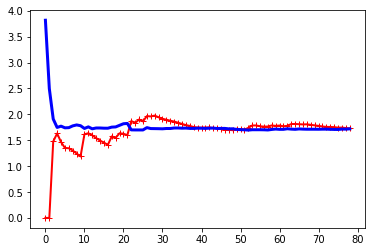

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

이 학습 곡선은 과소적합 모델의 전형적인 모습이다. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있다.

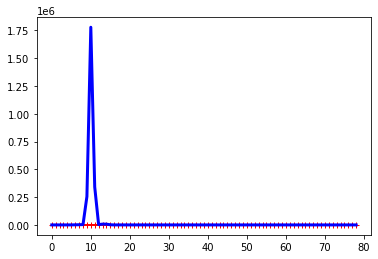

In [25]:
#같은 데이터에서 10차 다항 회귀 모델의 학습 곡선을 그리기

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([('poly_features',PolynomialFeatures(degree=10, include_bias=False)),('lin_reg',LinearRegression()),])

plot_learning_curves(polynomial_regression,X,y)

<편향/분산 트레이드오프>

* 편향 : 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것이다. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우이다. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽다.

* 분산 : 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타난다. 자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있다.

* 줄일 수 없는 오차 : 데이터 자체에 있는 잡음 때문에 발생한다. 이 오차를 줄이려면 데이터에서 잡음을 제거하는 것 밖에 방법이 없다.

### 4.5 규제가 있는 선형 모델

선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다.

#### 4.5.1 릿지 회귀

릿지 회귀는 규제항 $\alpha\sum_{i = 1}^{n}\theta_{i}^{2}$이 비용 함수에 추가된다. 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력한다. 규제항은 훈련하는 동안에만 비용 함수에 추가되고, 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가한다.

하이퍼파라미터 $\alpha$는 모델을 얼마나 많이 규제할지 조절한다. $\alpha=0$이면 릿지 회귀는 선형 회귀와 같아진다. $\alpha$가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.

<릿지 회귀의 비용 함수>

$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i = 1}^{n}\theta_{i}^{2}$

편향 $\theta_{0}$는 규제되지 않는다.

릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다.

$\alpha$를 증가시킬수록 직선에 가까워지는데, 모델의 분산은 줄어들고 편향이 커지는 것이다.

<릿지 회귀의 정규방정식>

${\hat \theta} = (X^{T}X+\alpha A)^{-1}X^{T}y$

In [26]:
#사이킷런에서 정규방정식을 사용한 릿지 회귀 적용

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.82699384]])

In [28]:
#확률적 경사 하강법 사용
sgd_reg = SGDRegressor(penalty='l2') #penalty : 사용할 규제 지정 - l2는 SGD가 비용 함수에 가중치 벡터의 l2 노름의 제곱을 2로 나눈 규제항을 추가하게 만든다.
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.8094665])

#### 4.5.2 라쏘 회귀

가중치 벡터의 l1 노름을 사용한다.

<라쏘 회귀의 비용 함수>

$J(\theta)=MSE(\theta)+\alpha\sum_{i = 1}^{n}|\theta_{i}|$

라쏘 회귀는 덜 중요한 특성의 가중치를 제거하려고 한다는 점이 중요하다. 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만든다.

릿지 회귀와 라쏘 회귀의 다른 점

* 파라미터가 전역 최적점에 가까워질수록 gradient가 작아진다. 따라서 경사 하강법이 자동으로 느려지고 수렴에 도움이 된다.(진동이 없다.)

* $\alpha$를 증가시킬수록 최적의 파라미터가 원점에 가까워지지만 완전히 0이 되지는 않는다.

In [29]:
#라쏘 회귀 사이킷런 예제
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.78634223])

#### 4.5.3 엘라스틱넷

엘라스틱넷 : 릿지, 라쏘 회귀를 절충한 모델. 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며 혼합 정도는 혼합 비율 r을 사용해 조절한다. r=0이면 릿지, r=1이면 라쏘 회귀와 같다.

<엘라스틱넷 비용 함수>

$J(\theta)=MSE(\theta)+r\alpha\sum_{i = 1}^{n}|\theta_{i}|+\frac{1-r}{2}\alpha\sum_{i = 1}^{n}\theta_{i}^{2}$

규제가 약간 있는 것이 대부분의 경우 좋으므로 일반적으로 평범한 선형 회귀는 피해야 한다. 릿지가 기본이지만 쓰이는 특성이 몇 개 뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다. 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 엘라스틱넷을 더 선호한다.

In [30]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.7868238])

#### 4.5.4 조기 종료

검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것을 통해 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 방식을 조기 종료라고 한다.

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#데이터 준비
poly_scaler = Pipeline([('poly_features',PolynomialFeatures(degree=90,include_bias=False)),('std_scaler',StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg=SGDRegressor(max_iter=1,tol=np.infty,warm_start=True,penalty=None,learning_rate='constant',eta0=0.0005)
minimum_val_error=float('inf')
best_epoch=None
best_model=None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,y_train) #훈련을 이어서 진행
  y_val_predict=sgd_reg.predict(X_val_poly_scaled)
  val_error=mean_squared_error(y_val,y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

### 4.6 로지스틱 회귀

샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용된다. 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측한다.(레이블이 1인 양성 클래스) 아니면 클래스에 속하지 않는다고 예측한다.(레이블이 0인 음성 클래스) 이를 이진 분류기라고 한다.

#### 4.6.1 확률 추정

선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 값을 계산하고 편향을 더한다. 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력한다.

<로지스틱 회귀 모델의 확률 추정(벡터 표현식)>

${\hat p} = h_{\theta}(x) = \sigma(\theta^{T}x)$

로지스틱($\sigma(.)$)은 0과 1 사이의 값을 출력하는 시그모이드 함수이다.

<로지스틱 함수>

$\sigma(t) = \frac{1}{1+exp(-t)}$

로지스틱 회귀 모델이 샘플 x가 양성 클래스에 속할 확률 ${\hat p} = h_{\theta}(x)$를 추정하면 이에 대한 예측 ${\hat y}$를 쉽게 구할 수 있다.

<로지스틱 회귀 모델 예측>

${\hat y} =	0({\hat p}<0.5), 1({\hat p}>=0.5)$

t<0이면 $\sigma(t)<0.5$이고, t>=0이면 $\sigma(t)>=0.5$이므로 로지스틱 회귀 모델은 $\theta^{T}x$가 양수일 때 1, 음수일 때 0이라고 예측한다.

#### 4.6.2 훈련과 비용 함수

훈련의 목적은 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것이다.

<하나의 훈련 샘플에 대한 비용 함수>

$c(\theta) =	-log({\hat p}) (y=1), -log({1-\hat p}) (y=0)$

t가 0에 가까워지면 -log(t)가 매우 커지므로 이 비용 함수는 타당하다. 따라서 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가하고, 음성 샘플을 1에 가까운 확률로 추정해도 비용이 증가할 것이다. 반면 t가 1에 가까우면 -log(t)는 0에 가까워진다. 따라서 기대한 대로 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워질 것이다.

전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것이다. 이를 다음과 같은 식으로 쓸 수 있다.

<로지스틱 회귀의 비용 함수(로그 손실)>

$J(\theta) = -\frac{1}{m}\sum_{i = 1}^{m}[log({\hat p}^{(i)})+(1-y^{(i)})log(1-{\hat p}^{(i)})]$

<로지스틱 비용 함수의 편도함수>

$\frac{\partial}{\partial\theta_{j}}J(\theta) = \frac{1}{m}\sum_{i = 1}^{m}(\sigma(\theta^{T}x^{(i)})-y^{(i)}))x_{j}^{(i)}$


#### 4.6.3 결정 경계

꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기를 만들어보자.

In [35]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())
X=iris['data'][:,3:] #꽃잎의 너비
y=(iris['target']==2).astype(np.int) # 1 Iris-Virginica면 1, 그렇지 않으면 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [36]:
#로지스틱 회귀 모델 훈련시키기
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

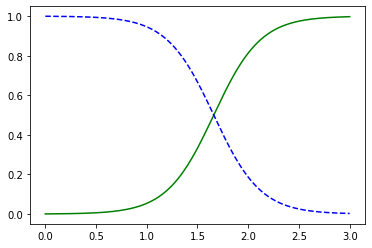

In [37]:
#꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label='Iris virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Iris virginica')

Iris-Verginica의 꽃잎 너비 :  1.4~2.5cm에 분포

다른 붓꽃 : 0.1~0.8cm에 분포

꽃잎 너비가 2cm 이상인 꽃은 분류기가 Iris-Verginica라고 강하게 확신할 수 있고 1cm 아래면 Iris-Verginica가 아니라고 강하게 확신할 수 있다. 이 두 극단 사이에서는 분류가 확실하지 않지만 클래스를 예측하려고 하면 가장 가능성 높은 클래스를 반환할 것이고, 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계가 만들어진다.

In [39]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

#### 4.6.4 소프트맥스 회귀

여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화한 것을 소프트맥스 회귀 또는 다항 로지스틱 회귀라고 한다.

샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $s_{k}(x)$를 계산하고, 그 점수에 소프트맥스 함수(정규화된 지수함수)를 적용하여 각 클래스의 확률을 추정한다.

<클래스 k에 대한 소프트맥스 함수>

$s_{k}(x) = (\theta^{(k)})^{T}x$

각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 있는데, 이 벡터들을 파라미터 행렬에 행으로 저장된다.

샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률을 추정할 수 있다. 이 함수는 각 점수에 지수함수를 적용한 후 정규화한다. 일반적으로 이 점수를 로짓 또는 로그-오즈라고 부른다.

<소프트맥스 함수>

${\hat p}_{k} = \sigma(s(x))_{k} = \frac{exp(s_{k}(x))}{\sum_{j = 1}^{K}exp(s_{j}(x))}$

* K : 클래스 수

* s(x) : 샘플 x에 대한 각 클래스의 점수를 담은 벡터

* $\sigma(s(x))_{k}$ : 샘플 x에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률

모델이 어떻게 확률을 추정하고 예측을 만드는지 알았으므로 훈련 방법에 대해 살펴보자. 모델이 타깃 클래스에 대해서는 높은 확률, 다른 클래스에 대해서는 낮은 확률을 추정하도록 만드는 것이 목적이다. 크로스 엔트로피 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합한다. 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용된다.

소프트맥스 회귀를 사용해 붓꽃을 3개의 클래스로 분류해보자. 사이킷런의 LogisticRegression은 클래스가 둘 이상이 때 기본적으로 일대다 전략을 사용하지만, multi_class 매개변수를 'multinomial'로 바꾸면 소프트맥스 회귀를 사용할 수 있다. 또한 solver 매개변수에 'lbfgs'와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 한다. 또한 기본적으로 하이퍼파라미터 C를 사용하여 조절할 수 있는 l2 규제가 적용된다.

In [40]:
X=iris['data'][:,(2,3)] #꽃잎 길이, 꽃잎 너비
y=iris['target']

softmax_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [43]:
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
